## 课程论文

 请务必交到exer8文件夹下，**谢绝交到master下**
+ 请不要改动任何文件，拜托
+ 请于12月30日前先在github上提交
+ 请在元旦后提交纸质版，将本页面文件先打印为pdf格式，再去打印店付印
+ 请将论文模板和本页面文件一起装订，前者放上面，本页面文件放下面
+ 纸质版提交时间和地点请留意微信群通知

请写一下姓名和学号：
+ 姓名  姚迈
+ 学号0165186

### 样本均值分布的统计试验

+ 请将CEPS.csv数据读入python
+ 请从中随机抽取1000个数据
+ 请根据问卷从数据中挑选两个连续型变量（likert量表可以近似看作连续变量）
+ 计算这两个连续变量的均值
+ 重复随机抽取—计算均值这个过程30次，得到两个变量30个样本均值
+ 绘制这30个样本均值的直方图
+ 计算均值的均值和标准误

[1679.7079102020266, 1561.8290153923035, 1642.3951031188965, 1613.9229399414064, 1640.5756978683473, 1642.8932144699097, 1579.287264781952, 1619.9326614837646, 1597.263363986969, 1605.0719064636232, 1615.550961868286, 1600.4030298728942, 1643.578575164795, 1612.5697000961306, 1631.1727951889038, 1605.2960648498536, 1653.1054263687133, 1571.818078437805, 1649.8171837654113, 1675.0063608779908, 1688.6365826759338, 1568.9890272598266, 1624.2671068878174, 1639.125535209656, 1638.432968700409, 1559.0609690055849, 1665.1411881675722, 1570.2631468467712, 1655.3312853088382]


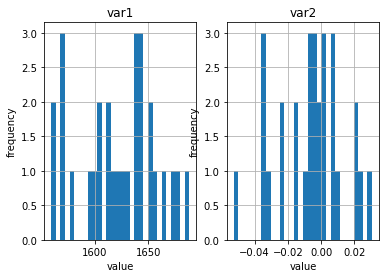

第一个变量的均值是： 1568.3481688087463
第一个变量的方差是： 1271.01785595
第二个变量的均值是： -0.006285028748292955
第二个变量的方差是： 0.000372969710642


In [4]:
import csv
import random
import matplotlib.pyplot as plt
import numpy as np

#读入csv文件
csv_file = csv.reader(open('CEPS.csv','r'))

#挑选的两个连续性变量：sweight, cog3pl
sw = []
co = []

for line in csv_file:
    sw.append(line[6])
    co.append(line[10])
sw.pop(0)
co.pop(0)

var1 = []
var2 = []
for i in range(1,30): #以下操作重复30次

    #随机抽取1000组数据
    sw_1000 = random.sample(sw, 1000)
    co_1000 = random.sample(co, 1000)

    #计算均值
    sum = 0.0
    for str in sw_1000:
        num = float(str)
        sum += num
    sw_mean = sum / 1000
    var1.append(sw_mean)
    
    sum = 0.0
    for str in co_1000:
        num = float(str)
        sum += num
    co_mean = sum / 1000
    var2.append(co_mean)
    
print(var1)

#绘制直方图

plt.subplot(1,2,1)
plt.hist(var1, bins = 30, label = ['var1'])
plt.grid(True)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('var1')

plt.subplot(1,2,2)
plt.hist(var2, bins = 30, label = ['var2'])
plt.grid(True)
plt.xlabel('value')
plt.ylabel('frequency')
plt.title('var2')
plt.show()


#计算均值和方差
sum = 0.0
for value in var1:
    sum += value
var1_mean = sum / 30
var1_var = np.var(var1)

sum = 0.0
for value in var2:
    sum += value
var2_mean = sum / 30
var2_var = np.var(var2)

print("第一个变量的均值是：", var1_mean)
print("第一个变量的方差是：", var1_var)

print("第二个变量的均值是：", var2_mean)
print("第二个变量的方差是：", var2_var)



    
    
    






### 回归分析

+ 请从CEPS.csv数据里挑选若干变量建立回归方程，要求至少三个自变量
    + 如，学生的学业成绩受认知水平、家庭收入的影响
    + 考虑因变量和自变量间的实质关系，变量间关系应该是有意义
    + 选择自变量时，注意变量的类型，如果是分类变量，需要进行编码
+ 请报告回归方程的结果，需要包括：
    + 模型拟合指标
    + 模型的显著性检验结果
    + 变量的系数
    + 各系数的显著性检验结果
    + 对模型结果的解释
    

In [5]:
import csv
import numpy as np
import matplotlib.pyplot as plt
from itertools import islice
import statsmodels.api as sm

#读入csv文件
csv_file = csv.reader(open('CEPS.csv','r'))


#自变量：stcog, cog3pl, c19
#因变量：sweigh
Y = []
X = [] #(stcog, cog3pl, c19)

def isNull(str):
    if str.strip()=='':
        return 1
    else:
        return 0

for line in islice(csv_file,1,None): #跳过第一行的变量名
    tmp = []
    if isNull(line[11]) or isNull(line[12]) or isNull(line[13]) or isNull(line[10]):
        continue
    tmp.append(float(line[11]))
    tmp.append(float(line[12]))
    tmp.append(float(line[13]))
    X.append(tmp)
    Y.append(float(line[10]))
    

X_np = np.array(X, dtype = float)
Y_np = np.array(Y, dtype = float)

X_np = sm.add_constant(X_np)
est = sm.OLS(Y_np, X_np)
est = est.fit()

#系数显著性水平(t-statistic), 模型显著性水平(F-statistic)
#拟合指标(MSE、R2_score)
print(est.summary())

#系数
print(est.params)




                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     2039.
Date:                Sat, 29 Dec 2018   Prob (F-statistic):               0.00
Time:                        22:50:45   Log-Likelihood:                -21368.
No. Observations:               18944   AIC:                         4.274e+04
Df Residuals:                   18940   BIC:                         4.277e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -1.1716      0.023    -51.790      0.0